In [ ]:
'''
Decision Trees.
Создадим гендерную модель на обучающем наборе «Титаник», используя деревья решений на Python.
'''

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import tree
from sklearn import preprocessing

titanic_train = pd.read_csv("train.csv")

# Вводим медианный возраст для пассажиров с N/A возрастом

new_age_var = np.where(titanic_train["Age"].isnull(), # Logical check
                       28,                       # Value if check is true
                       titanic_train["Age"])     # Value if check is false

titanic_train["Age"] = new_age_var 

In [12]:
label_encoder = preprocessing.LabelEncoder()

# Преобразуем параметр sex в цифровой
encoded_sex = label_encoder.fit_transform(titanic_train["Sex"])

# Инициализируем модель
tree_model = tree.DecisionTreeClassifier()

# Тренируем модель
tree_model.fit(X = pd.DataFrame(encoded_sex), 
               y = titanic_train["Survived"])

DecisionTreeClassifier()

[Text(0.5, 0.75, 'X[0] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.25, 0.25, 'gini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(0.75, 0.25, 'gini = 0.306\nsamples = 577\nvalue = [468, 109]')]

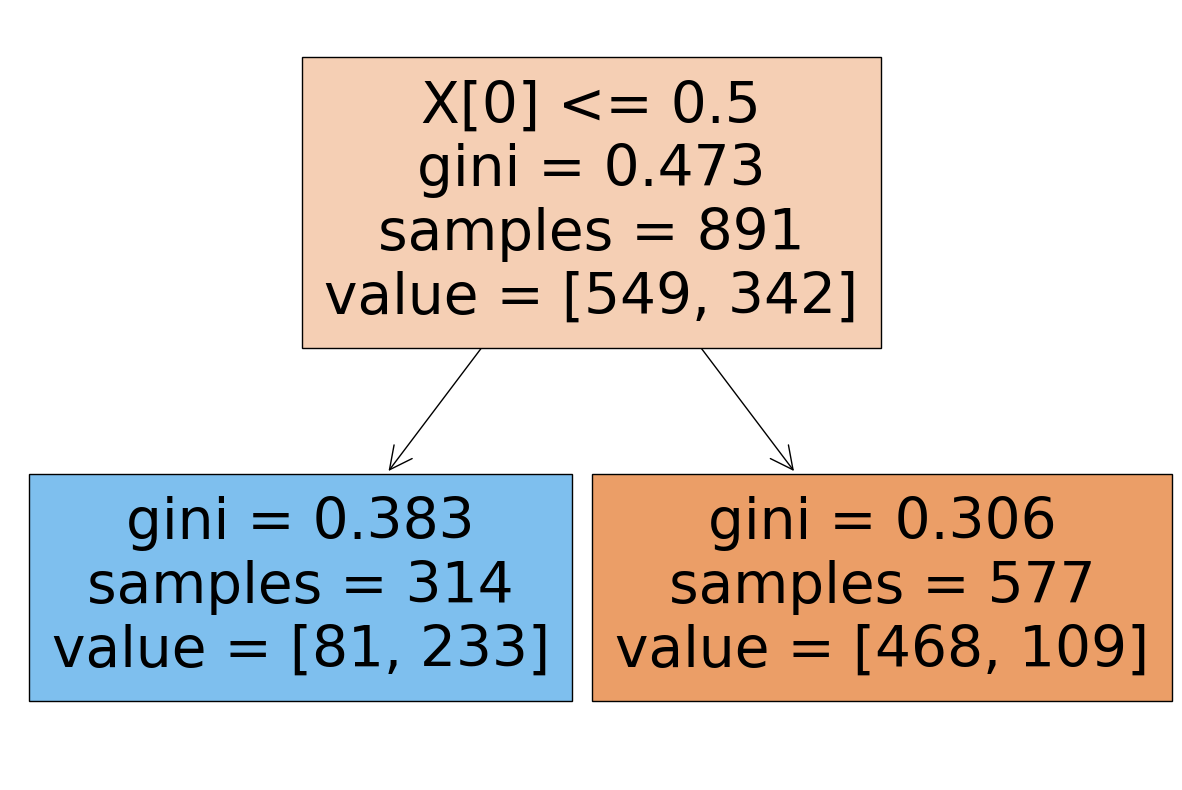

In [16]:
plt.figure(figsize=(15, 10))
tree.plot_tree(tree_model, filled=True)

In [17]:
# Сделаем предсказание
preds = tree_model.predict_proba(X = pd.DataFrame(encoded_sex))

pd.crosstab(preds[:,0], titanic_train["Sex"])

Sex,female,male
row_0,,
0.257962,314,0
0.811092,0,577


[Text(0.5, 0.875, 'X[0] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.3, 0.625, 'X[1] <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(0.2, 0.375, 'X[1] <= 1.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(0.1, 0.125, 'gini = 0.062\nsamples = 94\nvalue = [3, 91]'),
 Text(0.3, 0.125, 'gini = 0.145\nsamples = 76\nvalue = [6, 70]'),
 Text(0.4, 0.375, 'gini = 0.5\nsamples = 144\nvalue = [72, 72]'),
 Text(0.7, 0.625, 'X[1] <= 1.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(0.6, 0.375, 'gini = 0.466\nsamples = 122\nvalue = [77, 45]'),
 Text(0.8, 0.375, 'X[1] <= 2.5\ngini = 0.242\nsamples = 455\nvalue = [391, 64]'),
 Text(0.7, 0.125, 'gini = 0.265\nsamples = 108\nvalue = [91, 17]'),
 Text(0.9, 0.125, 'gini = 0.234\nsamples = 347\nvalue = [300, 47]')]

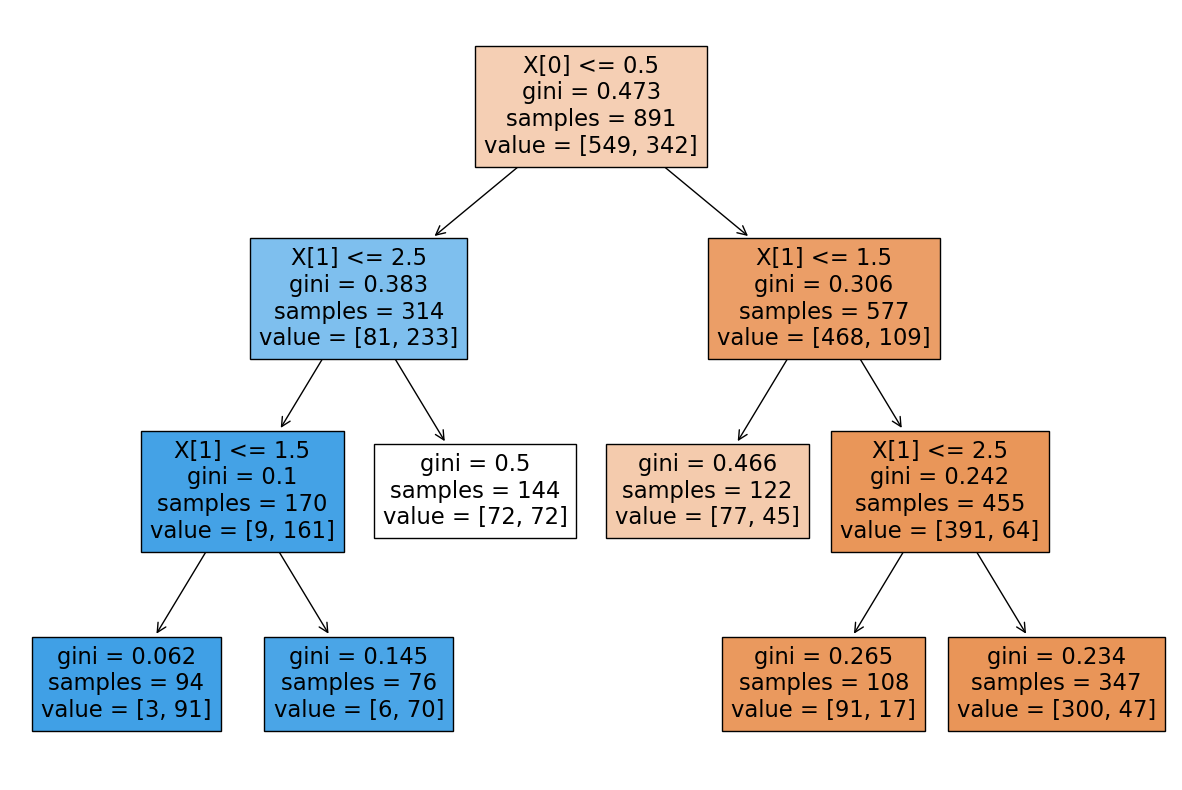

In [18]:
# Добавим класс пассажиров

predictors = pd.DataFrame([encoded_sex, titanic_train["Pclass"]]).T

tree_model.fit(X = predictors, 
               y = titanic_train["Survived"])

plt.figure(figsize=(15, 10))
tree.plot_tree(tree_model, filled=True)

In [ ]:
'''
Добавление переменной сделало дерево более сложный и глубоким.
'''

In [19]:
# Получим вероятность выживания
preds = tree_model.predict_proba(X = predictors)

# Создадим таблицу предсказаний для пола и класса
pd.crosstab(preds[:,0], columns = [titanic_train["Pclass"], 
                                   titanic_train["Sex"]])

Pclass        1           2           3     
Sex      female male female male female male
row_0                                       
0.031915     94    0      0    0      0    0
0.078947      0    0     76    0      0    0
0.500000      0    0      0    0    144    0
0.631148      0  122      0    0      0    0
0.842593      0    0      0  108      0    0
0.864553      0    0      0    0      0  347

[Text(0.4107142857142857, 0.9444444444444444, 'X[0] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.203027950310559, 0.8333333333333334, 'X[1] <= 2.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(0.059006211180124224, 0.7222222222222222, 'X[2] <= 2.5\ngini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(0.024844720496894408, 0.6111111111111112, 'X[1] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.012422360248447204, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.037267080745341616, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.09316770186335403, 0.6111111111111112, 'X[3] <= 28.856\ngini = 0.091\nsamples = 168\nvalue = [8, 160]'),
 Text(0.062111801242236024, 0.5, 'X[3] <= 28.231\ngini = 0.182\nsamples = 69\nvalue = [7, 62]'),
 Text(0.049689440993788817, 0.3888888888888889, 'X[2] <= 56.0\ngini = 0.161\nsamples = 68\nvalue = [6, 62]'),
 Text(0.024844720496894408, 0.2777777777777778, 'X[2] <= 23.5\ngini = 0.14\nsamples = 66\nva

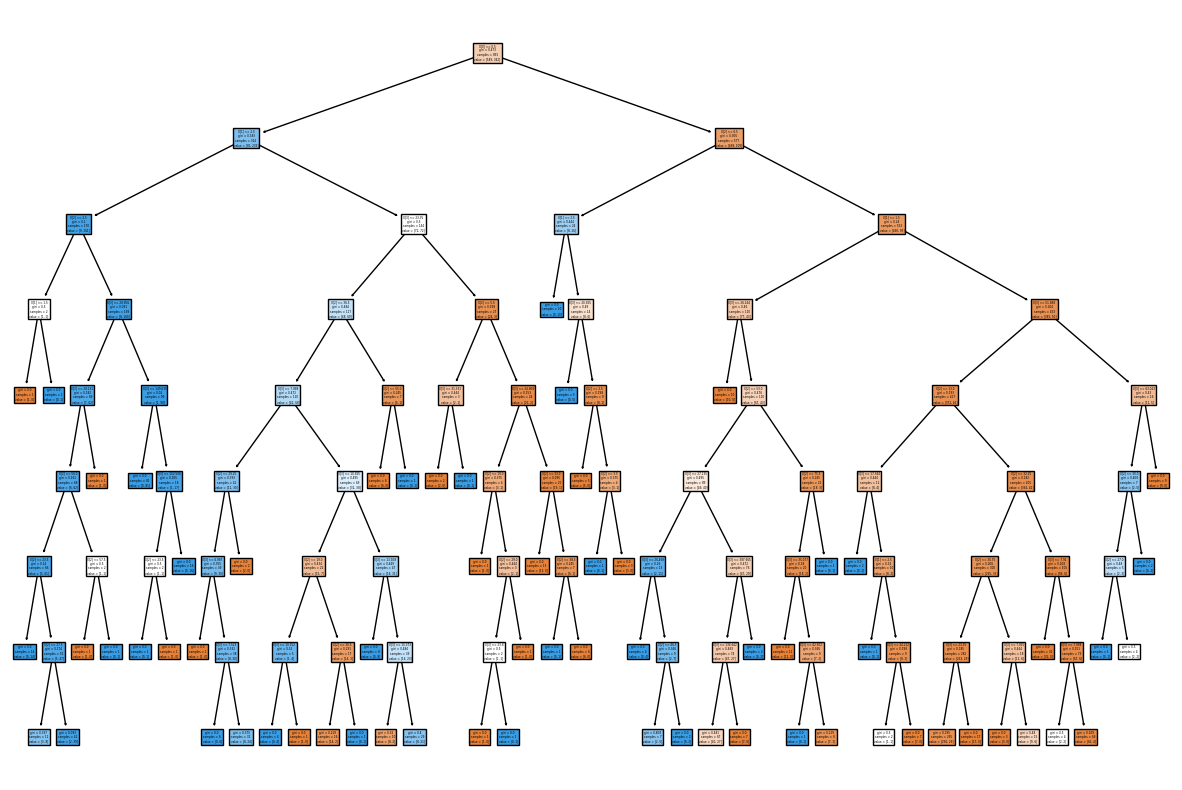

In [20]:
# Попробуем еще усложнить выбор

predictors = pd.DataFrame([encoded_sex,
                           titanic_train["Pclass"],
                           titanic_train["Age"],
                           titanic_train["Fare"]]).T

# Инициализируем модель с глубиной 8
tree_model = tree.DecisionTreeClassifier(max_depth = 8)

tree_model.fit(X = predictors, 
               y = titanic_train["Survived"])

plt.figure(figsize=(15, 10))
tree.plot_tree(tree_model, filled=True)

In [21]:
# Проверим точность этой модели дерева решений на обучающих данных.

tree_model.score(X = predictors, 
                 y = titanic_train["Survived"])

0.8888888888888888

In [ ]:
# Точность составила почти 89%. Загрузим тестовые данные.

In [23]:
titanic_test = pd.read_csv("test.csv")    

new_age_var = np.where(titanic_test["Age"].isnull(), 
                       28,                       
                       titanic_test["Age"])      

new_fare_var = np.where(titanic_test["Fare"].isnull(), 
                       50,                       
                       titanic_test["Fare"])     

titanic_test["Age"] = new_age_var 
titanic_test["Fare"] = new_fare_var

# Преобразуем данные согласно особенностям модели
encoded_sex_test = label_encoder.fit_transform(titanic_test["Sex"])

test_features = pd.DataFrame([encoded_sex_test,
                              titanic_test["Pclass"],
                              titanic_test["Age"],
                              titanic_test["Fare"]]).T

In [29]:
# Создадим test_model c ghtlcrfpfybtv
test_preds = tree_model.predict(X=test_features)

# Создадим submission
submission = pd.DataFrame({"PassengerId":titanic_test["PassengerId"],
                           "Survived":test_preds})

# Сохраним как csv
submission.to_csv("tutorial_dectree_submission.csv", 
                  index=False)

In [ ]:
'''
Ответ 0.78468
Меньше, чем при использовании train данных
Посмотрим на перекрестную проверку и удержание.
'''

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
v_train, v_test = train_test_split(titanic_train,     # Данные для резки
                                   test_size = 0.25,  # Размер
                                   random_state=1,    # Случайность
                                   stratify = titanic_train["Survived"]) 


print(v_train.shape)
print(v_test.shape)

(668, 12)
(223, 12)


In [40]:
from sklearn.model_selection import cross_val_score

In [42]:
scores = cross_val_score(estimator= tree_model,     # Модель
                X= titanic_train[["Sex","Pclass",   # Данные для train
                                  "Age","Fare"]],  
                y = titanic_train["Survived"],      # Целевая переменная
                scoring = "accuracy",               # Оценкочная метрика   
                cv=10)                              # Перекрестная проверка

print("Точность: ")
print(scores)
print("Срадняя точность: ", scores.mean())

Точность: 
[0.73333333 0.82022472 0.75280899 0.85393258 0.87640449 0.78651685
 0.83146067 0.76404494 0.85393258 0.84269663]
Срадняя точность:  0.8115355805243445


In [ ]:
'''
Функция cross_val_score полезна для тестирования моделей и настройки параметров модели/
Деревья решений — это легко интерпретируемая, но удивительно выразительная форма прогнозной модели. 
Дерево решений ограниченной глубины может стать хорошей отправной точкой для задач классификации, 
а сложность модели легко регулировать.
'''